In [131]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
import yfinance as yf
apple = yf.Ticker('AAPL')

apple.actions

hist=apple.history(period="1y")
hist=hist.reset_index()
hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-11-22 00:00:00-05:00,160.747061,164.743869,160.070993,160.090881,117467900,0.0,0
1,2021-11-23 00:00:00-05:00,160.190287,160.866371,158.142177,160.478622,96041900,0.0,0
2,2021-11-24 00:00:00-05:00,159.822434,161.204412,158.718838,161.005569,69463600,0.0,0
3,2021-11-26 00:00:00-05:00,158.649250,159.524162,155.457766,155.905167,76959800,0.0,0
4,2021-11-29 00:00:00-05:00,158.450379,160.259884,157.873723,159.315369,88748200,0.0,0


In [157]:
hist[["Close","Volume","Date"]]

,Close,Volume,Date
0,160.090881,117467900,2021-11-22 00:00:00-05:00
1,160.478622,96041900,2021-11-23 00:00:00-05:00
2,161.005569,69463600,2021-11-24 00:00:00-05:00
3,155.905167,76959800,2021-11-26 00:00:00-05:00
4,159.315369,88748200,2021-11-29 00:00:00-05:00
...,...,...,...
247,150.039993,89868300,2022-11-15 00:00:00-05:00
248,148.789993,64218300,2022-11-16 00:00:00-05:00
249,150.720001,80389400,2022-11-17 00:00:00-05:00
250,151.289993,74794600,2022-11-18 00:00:00-05:00


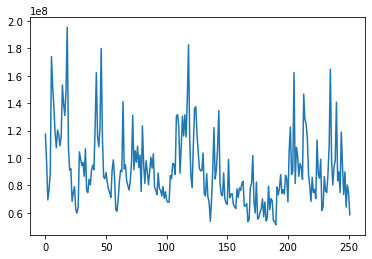

In [158]:
import matplotlib.pyplot as plt
plt.plot(hist[["Volume"]].iloc[:, 0])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f0d4934abd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0d4934f690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f0d4934a650>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0d49358190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f0d493586d0>],
 'means': []}

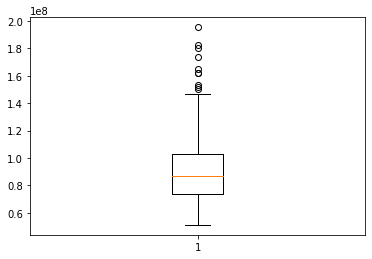

In [159]:
plt.boxplot(data=hist,x="Volume")

In [160]:
amt = hist[["Volume"]].iloc[:, 0]
amt.describe().astype('int')


count          252
mean      91457504
std       25857028
min       51218200
25%       73976925
50%       86648150
75%      103216575
max      195432700
Name: Volume, dtype: int64

In [161]:
import pandas as pd
import numpy as np

k = []
df = []
k_max = []

V0=hist["Volume"].mean()*(len(hist)/4)
print(V0)
data = hist[["Close","Volume","Date"]]
v=0
a=0
b=0
c=0

for i in range(0, data.shape[0]):
  v=0
  for j in range(i,0-1,-1):
    if(v < V0):
      a=a+1
      v=v+data.iloc[j, 1]
      df.append([data.iloc[i, 0]-data.iloc[j, 0],i,j,v])
      k.append(data.iloc[i, 0]-data.iloc[j, 0])
    else:
      break;
  df1=np.asarray(df)
  if (df1.shape[0]==0):
    c = np.max(df1[b:a])
  else:  
    c = np.max(df1[b:a,0])
  k_max.append(c)
  b=a
  
df = np.asarray(df)
m = np.argmax(k)
print(pd.DataFrame(df))
print(max(k))
print(df[m,1:].astype(int))

5761822800.0
               0      1      2             3
0       0.000000    0.0    0.0  1.174679e+08
1       0.000000    1.0    1.0  9.604190e+07
2       0.387741    1.0    0.0  2.135098e+08
3       0.000000    2.0    2.0  6.946360e+07
4       0.526947    2.0    1.0  1.655055e+08
...          ...    ...    ...           ...
14363 -15.339020  251.0  191.0  5.585904e+09
14364 -21.738419  251.0  190.0  5.637122e+09
14365 -19.242554  251.0  189.0  5.690964e+09
14366 -18.943054  251.0  188.0  5.745111e+09
14367 -19.282501  251.0  187.0  5.814138e+09

[14368 rows x 4 columns]
44.596435546875
[       184        142 3139425400]


In [162]:
k_max = np.asarray(k_max)
print(pd.DataFrame(k_max))  #n=0~251的所有最大價差

             0
0     0.000000
1     0.387741
2     0.914688
3     0.000000
4     3.410202
..         ...
247  15.169998
248  13.919998
249  15.850006
250  16.419998
251  13.139999

[252 rows x 1 columns]


In [163]:
a = df[m,1].astype(int)
b = df[m,2].astype(int)
print(data.iloc[a,2]) #出售日期
print(data.iloc[b,2]) #購買日期

2022-08-17 00:00:00-04:00
2022-06-16 00:00:00-04:00


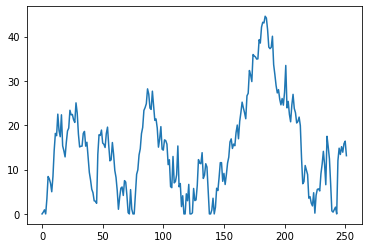

In [166]:
plt.plot(k_max)

In [167]:
def Y(Data):
  df_dp = pd.DataFrame(Data)
  df_dp = df_dp.iloc[:,0]
  m = float(df_dp.mean())
  se = float(df_dp.std() / len(hist)**0.5)

  return (m-1.96*se,m,m+1.96*se)

Y(Data = k_max)

(13.490195937640786, 14.79560070946103, 16.101005481281277)